In [1]:
from ipynb.fs.full.quantumsystem import QuantumSystem, qs, System, HyperSystem, MetaSystem, IntegerSystem

In [2]:
class Modifier(IntegerSystem):
    """ Value to adjust Dice Roll Target for Attack """

In [3]:
class Damage(IntegerSystem):
    """ Damage done on a successful Attack """

In [4]:
@Modifier.sd
@Damage.sd
class Targeting(HyperSystem):
    """ Ranged attack modifier and damage values """

In [5]:
@Targeting.sd
class ShortRangeWeapons(MetaSystem):
    """ asdf """

@Targeting.sd
class MidRangeWeapons(MetaSystem):
    """ asdf """

@Targeting.sd
class LongRangeWeapons(MetaSystem):
    """ asdf """

In [6]:
class OverheatValue(IntegerSystem):
    """ Number of Overheat slots """

In [7]:
class OverheatDamage(IntegerSystem):
    """ Additional Damage from overheating """

In [8]:
@OverheatDamage.sd
@OverheatValue.sd
class Overheat(HyperSystem):
    """ Overheating System """

In [9]:
@ShortRangeWeapons.sd
@MidRangeWeapons.sd
@LongRangeWeapons.sd
@Overheat.sd
class Weapons(HyperSystem):
    """ Weapons System """

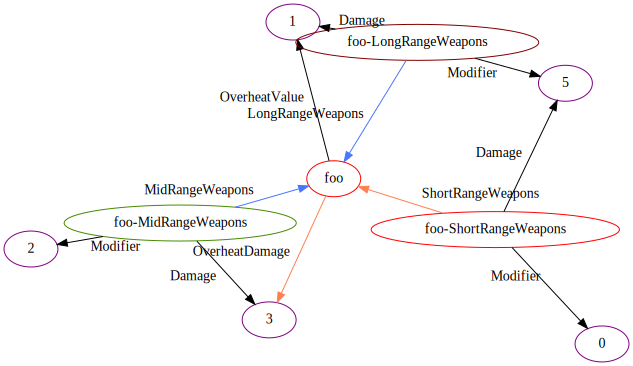

In [10]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()
    Weapons("foo",
        ShortRangeWeapons={"Targeting": {"Modifier": "0", "Damage": "5"}},
        MidRangeWeapons={"Targeting": {"Modifier": "2", "Damage": "3"}},
        LongRangeWeapons={"Targeting": {"Modifier": "5", "Damage": "1"}},
        Overheat={"OverheatValue": "1", "OverheatDamage": "3"})
    assert Weapons.entities() == ['foo']
    display(qs.render())